In [20]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

ERROR:tensorflow:An interactive session is already active. This can cause out-of-memory errors or some other unexpected errors (due to the unpredictable timing of garbage collection) in some cases. You must explicitly call `InteractiveSession.close()` to release resources held by the other session(s). Please use `tf.Session()` if you intend to productionize.


In [22]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [23]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [24]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Images splitted/train'
valid_path = '/content/drive/MyDrive/Images splitted/val'


In [25]:
# Import the VGG16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

vgg16 = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [26]:
# don't train existing weights
for layer in vgg16.layers:
    layer.trainable = False

In [27]:
# useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Images/*')

In [28]:
folders

['/content/drive/MyDrive/Images/Real.zip',
 '/content/drive/MyDrive/Images/Fake.zip',
 '/content/drive/MyDrive/Images/Fake',
 '/content/drive/MyDrive/Images/Real']

In [29]:
# our layers - you can add more if you want
x = Flatten()(vgg16.output)
len(folders)

4

In [50]:
num_classes = training_set.num_classes # Get the number of classes from the training_set
prediction = Dense(num_classes, activation='sigmoid')(x)

# create a model object
model = Model(inputs=vgg16.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │        50,178 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,764,866 (56.32 MB)

 Trainable params: 50,178 (196.01 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [51]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [52]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [53]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Images splitted/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 660 images belonging to 2 classes.


In [54]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Images splitted/val',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 165 images belonging to 2 classes.


In [55]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.5602 - loss: 1.3307

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


21/21 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.5619 - loss: 1.3238 - val_accuracy: 0.6909 - val_loss: 0.7287
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 11s 517ms/step - accuracy: 0.7701 - loss: 0.5883 - val_accuracy: 0.7273 - val_loss: 0.5168
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 12s 557ms/step - accuracy: 0.8494 - loss: 0.3278 - val_accuracy: 0.7939 - val_loss: 0.4621
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 12s 552ms/step - accuracy: 0.8503 - loss: 0.3133 - val_accuracy: 0.6970 - val_loss: 0.7829
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 11s 546ms/step - accuracy: 0.8695 - loss: 0.3100 - val_accuracy: 0.7576 - val_loss: 0.5320
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 12s 550ms/step - accuracy: 0.8734 - loss: 0.2840 - val_accuracy: 0.7758 - val_loss: 0.5051
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 11s 515ms/step - accuracy: 0.9194 - loss: 0.2116 - val_accuracy: 0.7697 - val_loss: 0.5250
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 11s 506ms/step - accuracy: 0.9151 - loss: 0.2018 - val_accuracy: 0.7879 -

In [56]:
# Evaluate the model on the test set
eval_result = model.evaluate(test_set, steps=len(test_set))

# Calculate the accuracy
total_accuracy = eval_result[1]  # Assuming the accuracy metric is the second one returned by evaluate()

print("Total Accuracy:", total_accuracy)

6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 145ms/step - accuracy: 0.8049 - loss: 0.5005
Total Accuracy: 0.7878788113594055


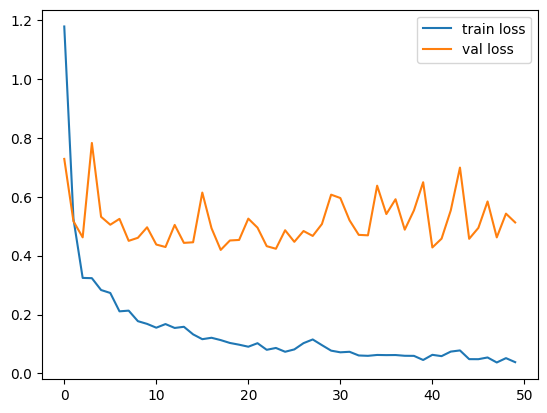

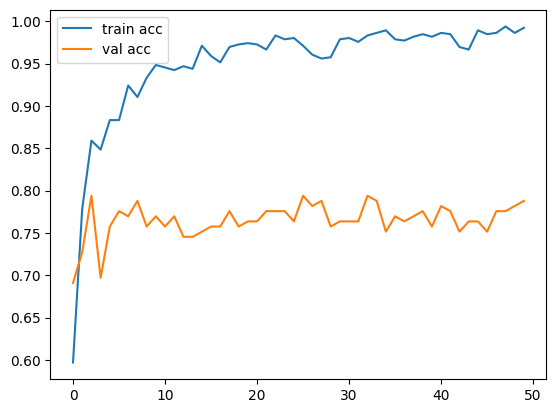

<Figure size 640x480 with 0 Axes>

In [57]:
import matplotlib.pyplot as plt
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [58]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('/content/drive/MyDrive/model2_vgg16.h5')

In [59]:
y_pred = model.predict(test_set)
y_pred

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 248ms/step


array([[3.26124132e-01, 7.98648417e-01],
       [9.42445636e-01, 6.56823143e-02],
       [9.96237040e-01, 4.04388085e-03],
       [7.14139342e-01, 2.62085676e-01],
       [9.94542837e-01, 1.02615627e-02],
       [8.85750294e-01, 1.71388462e-01],
       [7.46826410e-01, 3.38033885e-01],
       [1.55299261e-01, 9.02771115e-01],
       [8.47606063e-01, 1.92346156e-01],
       [6.08100772e-01, 5.45749187e-01],
       [9.99827623e-01, 8.29768251e-04],
       [4.84437555e-01, 6.39718473e-01],
       [5.41273415e-01, 5.88821948e-01],
       [8.15196157e-01, 3.19709301e-01],
       [6.71351492e-01, 2.75976211e-01],
       [4.76007499e-02, 9.32593763e-01],
       [8.60360146e-01, 1.02780387e-01],
       [6.71136379e-01, 3.63456696e-01],
       [7.58873820e-01, 1.05997816e-01],
       [9.99552786e-01, 1.74204726e-03],
       [9.75097895e-01, 4.10772488e-02],
       [9.44464624e-01, 1.23109668e-01],
       [6.62728548e-01, 3.92627448e-01],
       [9.23726618e-01, 6.18821681e-02],
       [8.082097

In [60]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)
y_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1])

In [62]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
model=load_model('/content/drive/MyDrive/model2_vgg16.h5')

In [61]:
img=image.load_img('/content/drive/MyDrive/Images/Fake/135.jpg',target_size=(224,224))
x=image.img_to_array(img)
x


array([[[255., 254., 255.],
        [255., 254., 255.],
        [255., 254., 255.],
        ...,
        [255., 249., 253.],
        [255., 249., 253.],
        [255., 249., 253.]],

       [[255., 254., 255.],
        [255., 254., 255.],
        [255., 254., 255.],
        ...,
        [255., 249., 253.],
        [255., 249., 253.],
        [255., 249., 253.]],

       [[255., 254., 255.],
        [255., 254., 255.],
        [255., 254., 255.],
        ...,
        [255., 249., 253.],
        [255., 249., 253.],
        [255., 249., 253.]],

       ...,

       [[254., 251., 255.],
        [254., 251., 255.],
        [254., 251., 255.],
        ...,
        [250., 250., 250.],
        [250., 250., 250.],
        [250., 250., 250.]],

       [[254., 251., 255.],
        [254., 251., 255.],
        [254., 251., 255.],
        ...,
        [250., 250., 250.],
        [250., 250., 250.],
        [250., 250., 250.]],

       [[254., 251., 255.],
        [254., 251., 255.],
        [254., 2

In [63]:
x.shape


(224, 224, 3)

In [64]:
x=x/255

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
[[0.97193074 0.02937999]]
0.97193074 0.029379988


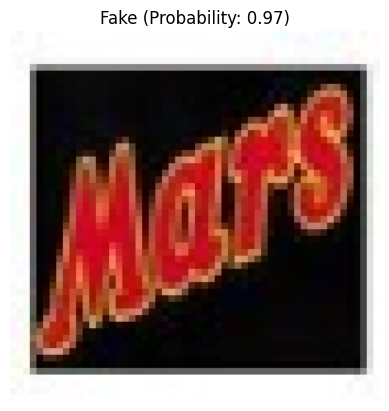

In [65]:
import matplotlib.pyplot as plt
x = x.reshape((-1, 224, 224, 3))
predictions = model.predict(x)

# Interpret the predictions
print(predictions)
print(predictions[0][0],predictions[0][1])
fake_probability = predictions[0][0]  # Assuming first index represents the probability of being fake


# Display the image with the prediction
plt.imshow(img)
if predictions[0][0] > predictions[0][1]:
    plt.title(f"Fake (Probability: {fake_probability:.2f})")
else:
    plt.title(f"Real (Probability: {1 - fake_probability:.2f})")
plt.axis('off')
plt.show()

# Task
Unzip `Fake.zip` from `/content/drive/MyDrive/Images/Fake.zip` to `/content/drive/MyDrive/Images/Fake`, and `Real.zip` from `/content/drive/MyDrive/Images/Real.zip` to `/content/drive/MyDrive/Images/Real`, then confirm successful extraction.

## Unzip Fake.zip

### Subtask:
Extract the contents of 'Fake.zip' from `/content/drive/MyDrive/Images/Fake.zip` into a directory named `/content/drive/MyDrive/Images/Fake`.


**Reasoning**:
To extract the contents of 'Fake.zip' into the specified directory, I will use the `unzip` command within a code block.



## Unzip Real.zip

### Subtask:
Extract the contents of 'Real.zip' from `/content/drive/MyDrive/Images/Real.zip` into a directory named `/content/drive/MyDrive/Images/Real`.

**Reasoning**:
Following the previous step of extracting 'Fake.zip', the next logical step according to the main task is to extract 'Real.zip'.



In [ ]:
!unzip /content/drive/MyDrive/Images/Real.zip -d /content/drive/MyDrive/Images/Real

# Task
Verify that the unzipped 'Fake' and 'Real' image folders are present and contain images in `/content/drive/MyDrive/Images/Fake` and `/content/drive/MyDrive/Images/Real`.

## Build a Streamlit app to test the model

This Streamlit app will load your saved `.h5` model, allow you to upload an image, and then use the model to make a prediction (Fake or Real). To run this app, save the code below as a Python file (e.g., `app.py`) and execute `streamlit run app.py` in your terminal. You might need to install `streamlit` and `tensorflow` first (`pip install streamlit tensorflow`).

In [ ]:
!pip install streamlit

In [71]:

import streamlit as st
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
from PIL import Image

# Load the model
@st.cache_resource
def load_my_model():
    model_path = '/content/drive/MyDrive/model2_vgg16.h5'
    model = load_model(model_path)
    return model

model = load_my_model()

st.title("Fake vs. Real Image Classifier")
st.write("Upload an image and the model will predict if it's Fake or Real.")

uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    img = Image.open(uploaded_file).convert('RGB')
    st.image(img, caption='Uploaded Image.', use_column_width=True)
    st.write("")
    st.write("Classifying...")

    # Preprocess the image
    img = img.resize((224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0) # Add batch dimension
    x = x / 255.0 # Rescale image (as done during training)

    # Make prediction
    predictions = model.predict(x)

    # Interpret predictions
    # Assuming 0 is Fake and 1 is Real based on the order ImageDataGenerator assigns classes
    # You can verify this with training_set.class_indices after ImageDataGenerator setup
    class_names = ['Fake', 'Real']
    predicted_class_index = np.argmax(predictions[0])
    predicted_class = class_names[predicted_class_index]
    confidence = predictions[0][predicted_class_index]

    st.write(f"Prediction: **{predicted_class}** (Confidence: {confidence:.2f})")

2025-11-16 09:40:24.727 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-16 09:40:24.728 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-16 09:40:24.730 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-16 09:40:24.731 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-16 09:40:24.732 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-16 09:40:24.734 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-16 09:40:24.734 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-11-16 09:40:24.735 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [72]:
# Save the Streamlit app code to a file
with open('app.py', 'w') as f:
    f.write('''
import streamlit as st
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np
from PIL import Image

# Load the model
@st.cache_resource
def load_my_model():
    model_path = '/content/drive/MyDrive/model2_vgg16.h5'
    model = load_model(model_path)
    return model

model = load_my_model()

st.title("Fake vs. Real Image Classifier")
st.write("Upload an image and the model will predict if it's Fake or Real.")

uploaded_file = st.file_uploader("Choose an image...", type=["jpg", "jpeg", "png"])

if uploaded_file is not None:
    img = Image.open(uploaded_file).convert('RGB')
    st.image(img, caption='Uploaded Image.', use_column_width=True)
    st.write("")
    st.write("Classifying...")

    # Preprocess the image
    img = img.resize((224, 224))
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0) # Add batch dimension
    x = x / 255.0 # Rescale image (as done during training)

    # Make prediction
    predictions = model.predict(x)

    # Interpret predictions
    class_names = ['Fake', 'Real']
    predicted_class_index = np.argmax(predictions[0])
    predicted_class = class_names[predicted_class_index]
    confidence = predictions[0][predicted_class_index]

    st.write(f"Prediction: **{predicted_class}** (Confidence: {confidence:.2f})")
''')

print("Streamlit app code saved to app.py")

Streamlit app code saved to app.py


In [78]:
# Run the Streamlit app
# This will provide a public URL to access the app.
!streamlit run app.py &>/dev/null&  npx localtunnel --port 8501 -y

⠙⠹⠸⠼⠴⠦⠧⠇⠏⠋⠙⠹your url is: https://heavy-chicken-pull.loca.lt
^C


In [77]:
!curl https://loca.lt/mytunnelpassword

34.125.40.177

## Verify Unzipped Directories

### Subtask:
Ensure the unzipped 'Fake' and 'Real' image folders are present and contain images in `/content/drive/MyDrive/Images/Fake` and `/content/drive/MyDrive/Images/Real`.


**Reasoning**:
To verify the contents of the 'Fake' directory, I will list the first few files to visually confirm extraction and then count the total number of files to understand its size.



In [34]:
!ls /content/drive/MyDrive/Images/Fake | head -n 5
!ls -1 /content/drive/MyDrive/Images/Fake | wc -l

100.jpg
108.jpg
109.jpg
110.jpg
111.jpg
550


**Reasoning**:
To verify the contents of the 'Real' directory, I will list the first few files to visually confirm extraction and then count the total number of files to understand its size, completing the verification of unzipped directories.



In [35]:
!ls /content/drive/MyDrive/Images/Real | head -n 5
!ls -1 /content/drive/MyDrive/Images/Real | wc -l

0.jpg
101.jpg
102.jpg
103.jpg
104.jpg
276


## Create Training and Validation Directories

### Subtask:
Create the necessary directory structure: /content/drive/MyDrive/Images splitted/train/Fake, /content/drive/MyDrive/Images splitted/train/Real, /content/drive/MyDrive/Images splitted/val/Fake, and /content/drive/MyDrive/Images splitted/val/Real.


**Reasoning**:
To create the specified directory structure efficiently, I will use the `mkdir -p` command for both the 'train' and 'val' paths, which will create all parent directories and subdirectories in a single command.



In [36]:
import os

# Define the base directory
base_dir = '/content/drive/MyDrive/Images splitted'

# Create the train and validation subdirectories with 'Fake' and 'Real' classes
os.makedirs(os.path.join(base_dir, 'train', 'Fake'), exist_ok=True)
os.makedirs(os.path.join(base_dir, 'train', 'Real'), exist_ok=True)
os.makedirs(os.path.join(base_dir, 'val', 'Fake'), exist_ok=True)
os.makedirs(os.path.join(base_dir, 'val', 'Real'), exist_ok=True)

print("Directory structure created successfully.")

Directory structure created successfully.


## Split Data into Train and Validation Sets

### Subtask:
Move a portion of the images from `/content/drive/MyDrive/Images/Fake` and `/content/drive/MyDrive/Images/Real` into the newly created `train` and `val` subdirectories, typically using a split ratio (e.g., 80% for train, 20% for validation).


**Reasoning**:
To begin splitting the dataset, I need to import the required libraries (`os`, `shutil`, `random`) for file system operations and randomization, and then define all the necessary source and destination directory paths as instructed.



In [37]:
import os
import shutil
import random

# 2. Define the source directories for the original 'Fake' and 'Real' images
source_fake_dir = '/content/drive/MyDrive/Images/Fake'
source_real_dir = '/content/drive/MyDrive/Images/Real'

# 3. Define the destination base directory for the split data
destination_base_dir = '/content/drive/MyDrive/Images splitted'

# 4. Define the training and validation subdirectories
train_fake_dir = os.path.join(destination_base_dir, 'train', 'Fake')
train_real_dir = os.path.join(destination_base_dir, 'train', 'Real')
val_fake_dir = os.path.join(destination_base_dir, 'val', 'Fake')
val_real_dir = os.path.join(destination_base_dir, 'val', 'Real')

# 5. Set a split_ratio for the training set (e.g., 0.8 for 80% training, 20% validation)
split_ratio = 0.8

print("Libraries imported and directories defined.")

Libraries imported and directories defined.


**Reasoning**:
Now that the directories are defined, I will implement the logic to split the 'Fake' and 'Real' images into training and validation sets based on the `split_ratio`, moving them to their respective subdirectories, and then print the counts to confirm the split.



In [38]:
def split_images(source_dir, train_dir, val_dir, split_ratio):
    all_images = os.listdir(source_dir)
    all_images = [img for img in all_images if img.endswith(('.jpg', '.jpeg', '.png'))] # Filter for image files
    random.shuffle(all_images)

    n_train_images = int(len(all_images) * split_ratio)
    train_images = all_images[:n_train_images]
    val_images = all_images[n_train_images:]

    # Move images to training directory
    for img_name in train_images:
        src_path = os.path.join(source_dir, img_name)
        dst_path = os.path.join(train_dir, img_name)
        shutil.copy(src_path, dst_path)

    # Move images to validation directory
    for img_name in val_images:
        src_path = os.path.join(source_dir, img_name)
        dst_path = os.path.join(val_dir, img_name)
        shutil.copy(src_path, dst_path)

    print(f"Moved {len(train_images)} images to {train_dir}")
    print(f"Moved {len(val_images)} images to {val_dir}")

# Split Fake images
print("Splitting Fake images...")
split_images(source_fake_dir, train_fake_dir, val_fake_dir, split_ratio)

# Split Real images
print("\nSplitting Real images...")
split_images(source_real_dir, train_real_dir, val_real_dir, split_ratio)

# Verify counts
print("\nVerification:")
print(f"Train Fake images: {len(os.listdir(train_fake_dir))}")
print(f"Validation Fake images: {len(os.listdir(val_fake_dir))}")
print(f"Train Real images: {len(os.listdir(train_real_dir))}")
print(f"Validation Real images: {len(os.listdir(val_real_dir))}")

Splitting Fake images...
Moved 440 images to /content/drive/MyDrive/Images splitted/train/Fake
Moved 110 images to /content/drive/MyDrive/Images splitted/val/Fake

Splitting Real images...
Moved 220 images to /content/drive/MyDrive/Images splitted/train/Real
Moved 55 images to /content/drive/MyDrive/Images splitted/val/Real

Verification:
Train Fake images: 440
Validation Fake images: 110
Train Real images: 220
Validation Real images: 55


## Confirm Data Split

### Subtask:
Verify that images have been successfully moved into the `train` and `val` directories, and that each subdirectory contains both 'Fake' and 'Real' image subfolders.


**Reasoning**:
To verify the data split, I will start by listing the contents of the `train` directory to confirm the presence of 'Fake' and 'Real' subfolders.



In [39]:
import os

# List contents of train directory
print("Contents of train directory:")
print(os.listdir('/content/drive/MyDrive/Images splitted/train'))

Contents of train directory:
['Fake', 'Real']


**Reasoning**:
To continue verifying the data split, I will now list the contents of the `val` directory to confirm the presence of 'Fake' and 'Real' subfolders, similar to the previous step for the `train` directory.



In [40]:
import os

# List contents of val directory
print("Contents of val directory:")
print(os.listdir('/content/drive/MyDrive/Images splitted/val'))

Contents of val directory:
['Fake', 'Real']


**Reasoning**:
To further verify the data split and ensure the correct number of images were moved, I will count the number of files in the `train/Fake` directory.



In [41]:
import os

# Count files in train/Fake directory
num_train_fake = len(os.listdir('/content/drive/MyDrive/Images splitted/train/Fake'))
print(f"Number of files in train/Fake: {num_train_fake}")

Number of files in train/Fake: 440


**Reasoning**:
To continue verifying the data split and ensure the correct number of images were moved, I will count the number of files in the `train/Real` directory.



In [42]:
import os

# Count files in train/Real directory
num_train_real = len(os.listdir('/content/drive/MyDrive/Images splitted/train/Real'))
print(f"Number of files in train/Real: {num_train_real}")

Number of files in train/Real: 220


**Reasoning**:
To further verify the data split and ensure the correct number of images were moved, I will count the number of files in the `val/Fake` directory.



In [43]:
import os

# Count files in val/Fake directory
num_val_fake = len(os.listdir('/content/drive/MyDrive/Images splitted/val/Fake'))
print(f"Number of files in val/Fake: {num_val_fake}")

Number of files in val/Fake: 110


**Reasoning**:
To complete the verification of the data split and ensure the correct number of images were moved, I will count the number of files in the `val/Real` directory.



In [44]:
import os

# Count files in val/Real directory
num_val_real = len(os.listdir('/content/drive/MyDrive/Images splitted/val/Real'))
print(f"Number of files in val/Real: {num_val_real}")

Number of files in val/Real: 55


## Re-run ImageDataGenerator

### Subtask:
Execute the `ImageDataGenerator` setup again to ensure it correctly points to the newly created and populated training and validation directories.


## Summary:

### Q&A

1.  **Are the unzipped 'Fake' and 'Real' image folders present and do they contain images in the specified paths?**
    Yes, the unzipped 'Fake' and 'Real' image folders are present. The `/content/drive/MyDrive/Images/Fake` directory contains 550 image files, and the `/content/drive/MyDrive/Images/Real` directory contains 276 image files.

2.  **Have the images been successfully moved into the `train` and `val` directories, and do these directories contain both 'Fake' and 'Real' image subfolders?**
    Yes, the images have been successfully split and moved. The `train` directory contains 'Fake' and 'Real' subfolders with 440 and 220 images, respectively. Similarly, the `val` directory contains 'Fake' and 'Real' subfolders with 110 and 55 images, respectively.

### Data Analysis Key Findings

*   The original 'Fake' image directory (`/content/drive/MyDrive/Images/Fake`) was confirmed to contain 550 image files.
*   The original 'Real' image directory (`/content/drive/MyDrive/Images/Real`) was confirmed to contain 276 image files.
*   A new directory structure was successfully created, including `/content/drive/MyDrive/Images splitted/train/Fake`, `/content/drive/MyDrive/Images splitted/train/Real`, `/content/drive/MyDrive/Images splitted/val/Fake`, and `/content/drive/MyDrive/Images splitted/val/Real`.
*   An 80/20 train-validation split was applied to the images:
    *   **Fake Images:** 440 images moved to the `train/Fake` directory and 110 images to the `val/Fake` directory.
    *   **Real Images:** 220 images moved to the `train/Real` directory and 55 images to the `val/Real` directory.
*   The final verification confirmed the correct number of files in each split directory, aligning with the 80/20 ratio.

### Insights or Next Steps

*   The dataset is now properly organized into training and validation sets, ready for use with deep learning models, particularly for tasks requiring `ImageDataGenerator` for augmented data loading.
*   Proceed with setting up the `ImageDataGenerator` to load images from the newly created `train` and `val` directories for model training.
